In [36]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

BTI = Number of advanced issues / Total Number of issues

In [37]:
# Get sp500 ticker
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', {'class': 'wikitable sortable'})
rows = table.find_all('tr')[1:]  # skip the header row

sp500 = []

for row in rows:
    cells = row.find_all('td')
    ticker = cells[0].text.strip()
    company = cells[1].text.strip()
    sector = cells[3].text.strip()
    #sp500.append({'ticker': ticker, 'company': company, 'sector': sector})
    ticker = ticker.replace('.','')
    sp500.append(ticker)

In [38]:
tickers = sp500

start_date = '2018-01-01'
end_date = '2023-11-20'

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
advancing_issues = (data.diff() > 0).sum(axis=1)
declining_issues = (data.diff() < 0).sum(axis=1)
BTI = advancing_issues / (advancing_issues + declining_issues)
BTI

[*********************100%%**********************]  503 of 503 completed


2 Failed downloads:
['BFB', 'BRKB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Date
2018-01-02         NaN
2018-01-03    0.694845
2018-01-04    0.656315
2018-01-05    0.713402
2018-01-08    0.698545
                ...   
2023-11-13    0.386774
2023-11-14    0.928144
2023-11-15    0.610000
2023-11-16    0.449102
2023-11-17    0.660643
Length: 1481, dtype: float64

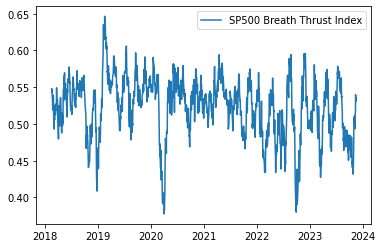

In [39]:
BTI_smoothed = BTI.rolling(window=30).mean()
plt.plot(BTI_smoothed.index, BTI_smoothed, label=f'SP500 Breath Thrust Index')
plt.legend()
plt.show()